# Import Packages

In [77]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [78]:
#Basic packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import pathlib

#Tensorflow
import tensorflow as tf

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, 
                             f1_score, 
                             confusion_matrix, 
                             classification_report,
                            ConfusionMatrixDisplay)

# I.  Proprocessing Data

## 1. Import data and discovery data

In [79]:
data= pd.read_csv('rice_dataset_simplified.csv')
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,Rice_type
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,Basmati
1,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,Basmati
2,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,Basmati
3,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,Basmati
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,Basmati


**Null value check in dataset.**

In [80]:
sum(data.isna().sum())

0

**Comment on dataset: This data set have any null value**

**Check dataset have any duplicate:**

In [81]:
data.duplicated().sum()

0

**Comment on dataset: This data set doesn't have duplicates**

**Label Check.**

In [82]:
data['Rice_type'].value_counts()

Basmati      1000
Arborio      1000
Ipsala       1000
Jasmine      1000
Karacadag    1000
Name: Rice_type, dtype: int64

**Comment on dataset: the target of this dataset is equally splitted**

**Check Features outliers:**

In [83]:

if ((data.iloc[:, :-1] > 255).any == True):
    print('Outlier')
else:
    print("Dataset doesn't have outlier")

Dataset doesn't have outlier


## 2.Preview Image

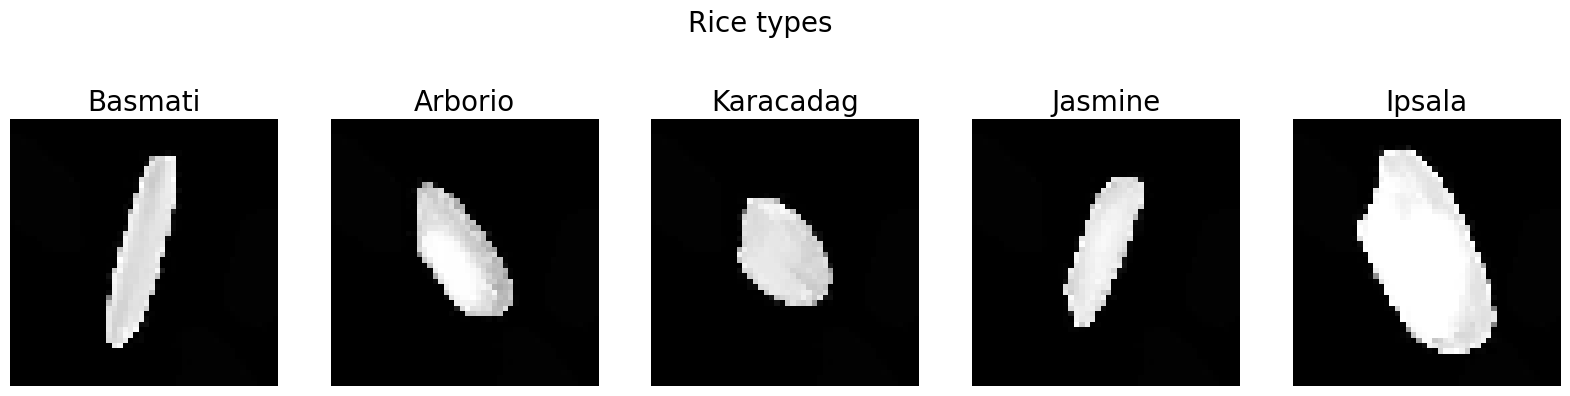

In [84]:
# Preview these five kinds of rices.
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('Rice types', fontsize=20)
types_rice = ['Basmati', 'Arborio', 'Karacadag', 'Jasmine', "Ipsala"]

for ax, label in zip(axs.flatten(), types_rice):
    img = data[data['Rice_type'] == label].iloc[0, :-1].to_numpy().astype(np.int64)
    ax.imshow(img.reshape(50, 50), cmap='gray')
    ax.set_title(label, fontsize=20)
    ax.axis('off')

plt.show()

## 3 Processing


### Label Processing

In [85]:
data['Rice_type'].value_counts()

Basmati      1000
Arborio      1000
Ipsala       1000
Jasmine      1000
Karacadag    1000
Name: Rice_type, dtype: int64

As this is a **classification**, we decide to replace the label of the dataset into numbers.

In [86]:
data['Rice_type'] = data['Rice_type'].replace({
    'Basmati': 0,
    "Arborio": 1,
    "Karacadag": 2,
    "Jasmine": 3,
    "Ipsala": 4
})
data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,Rice_type
0,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,0,0,0,0,0


### Features processing

As all features are pixels in the **50x50** images and this dataset does not has any outliers - we decide to divide all values by 255 to do the **normalization process** to all pixel values.

In [87]:
data.iloc[:, :-1] = data.iloc[:, :-1] / 255
data.head()

<ipython-input-87-a13f3c1c5fd0>:1: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.iloc[:, :-1] = data.iloc[:, :-1] / 255


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel2491,pixel2492,pixel2493,pixel2494,pixel2495,pixel2496,pixel2497,pixel2498,pixel2499,Rice_type
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.007843,0.007843,0.007843,0.007843,0.007843,0.0,0.0,0.0,0.0,0


# II Data Splitting


In [88]:
X, y = data.iloc[:, :-1], data.iloc[:, -1]
#Split dataset into training, validation and testing datasets.
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    train_size= 0.7,
                                                    stratify=y,
                                                   random_state=42)

X_val, X_test, y_val, y_test = train_test_split(X_test,
                                               y_test,
                                               train_size= 1/3,
                                               stratify=y_test,
                                               random_state=42)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(3500, 2500)
(500, 2500)
(1000, 2500)


In this case, We will split dataset into three parts and the ratio of each part is as follows:
<li>70% for training set;</li>
<li>10% for validation set;</li>
<li>20% for testing set.</li>

# III MLP Model

## Create Model MLP (Basic)


In [89]:
tf.keras.backend.clear_session()

model_mlp = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2500)),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=8, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='softmax'),
])
model_mlp.summary()


# One dense layer with 8 units and the activation function is 'relu'
# Another dense layer with 8 units and the activation function is 'relu'
# Final desnse layer (Output) with 5 units(5 catogories for label) and the activation function is 'softmax'

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 20008     
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 5)                 45        
                                                                 
Total params: 20,125
Trainable params: 20,125
Non-trainable params: 0
_________________________________________________________________


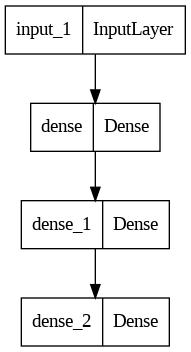

In [90]:
tf.keras.utils.plot_model(model_mlp)

### Training and complie


In [91]:
model_mlp.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics=['accuracy'])
model_mlp_his = model_mlp.fit(X_train,
                             y_train,
                             epochs=30,
                             batch_size=16,
                             validation_data=(X_val, y_val)
                             )

Epoch 1/30
219/219 [==============================] - 2s 5ms/step - loss: 0.8228 - accuracy: 0.6340 - val_loss: 0.4191 - val_accuracy: 0.8340
Epoch 2/30
219/219 [==============================] - 1s 4ms/step - loss: 0.3298 - accuracy: 0.8726 - val_loss: 0.2573 - val_accuracy: 0.9260
Epoch 3/30
219/219 [==============================] - 1s 4ms/step - loss: 0.1503 - accuracy: 0.9523 - val_loss: 0.1357 - val_accuracy: 0.9660
Epoch 4/30
219/219 [==============================] - 1s 4ms/step - loss: 0.1066 - accuracy: 0.9654 - val_loss: 0.0771 - val_accuracy: 0.9760
Epoch 5/30
219/219 [==============================] - 1s 4ms/step - loss: 0.1002 - accuracy: 0.9657 - val_loss: 0.0891 - val_accuracy: 0.9700
Epoch 6/30
219/219 [==============================] - 1s 4ms/step - loss: 0.0578 - accuracy: 0.9769 - val_loss: 0.0799 - val_accuracy: 0.9700
Epoch 7/30
219/219 [==============================] - 1s 4ms/step - loss: 0.0844 - accuracy: 0.9751 - val_loss: 0.1522 - val_accuracy: 0.9480
Epoch 

In [92]:
model_mlp_his.history

{'loss': [0.8227734565734863,
  0.32978811860084534,
  0.1502918303012848,
  0.10660971701145172,
  0.10017711669206619,
  0.05783706530928612,
  0.08443368226289749,
  0.06585953384637833,
  0.0717974454164505,
  0.05519796162843704,
  0.09714601933956146,
  0.13670039176940918,
  0.031475428491830826,
  0.04135856032371521,
  0.042700689285993576,
  0.041441887617111206,
  0.030155204236507416,
  0.03348571062088013,
  0.06207502633333206,
  0.09214010834693909,
  0.05473679304122925,
  0.021953048184514046,
  0.023329047486186028,
  0.02962464839220047,
  0.06161138042807579,
  0.09831996262073517,
  0.03247680515050888,
  0.011897852644324303,
  0.023345062509179115,
  0.04135623946785927],
 'accuracy': [0.6340000033378601,
  0.8725714087486267,
  0.9522857069969177,
  0.9654285907745361,
  0.9657142758369446,
  0.9768571257591248,
  0.9751428365707397,
  0.9745714068412781,
  0.9745714068412781,
  0.9817143082618713,
  0.9671428799629211,
  0.9620000123977661,
  0.9874285459518433

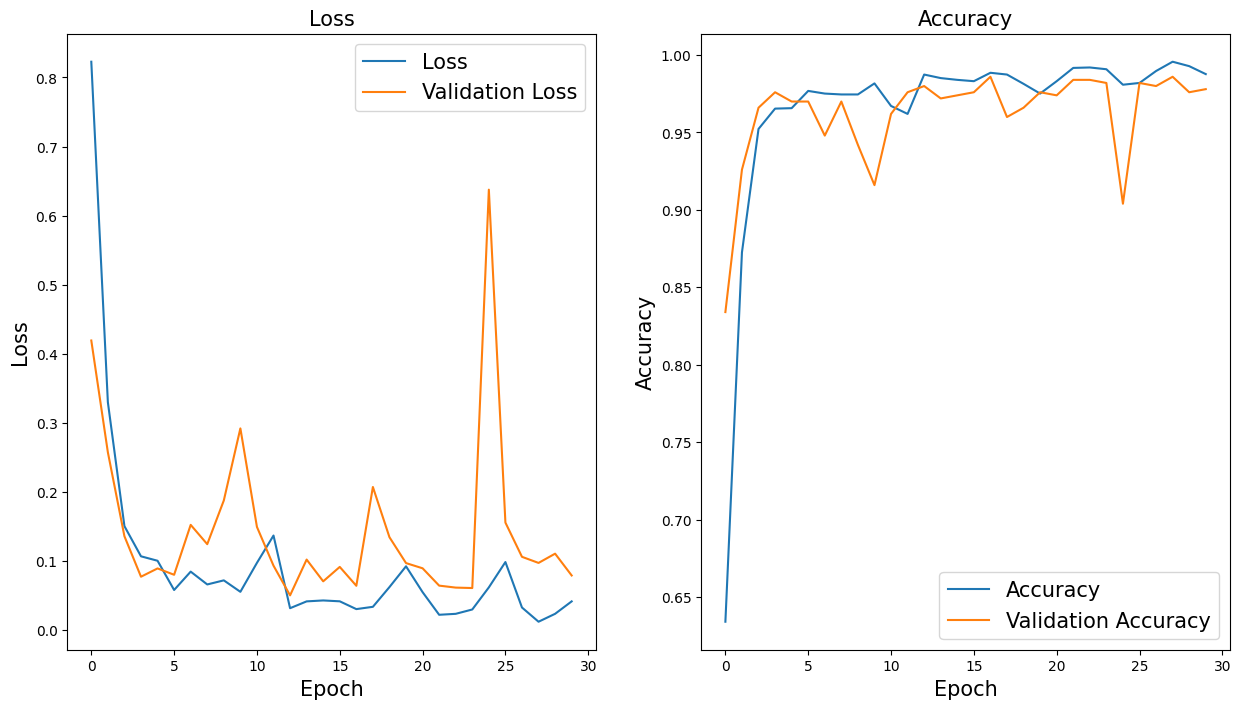

In [93]:
fig, ax = plt.subplots(1,2,figsize=(15,8))

ax[0].plot(model_mlp_his.history['loss'], label='Loss')
ax[0].plot(model_mlp_his.history['val_loss'], label='Validation Loss')
ax[0].set_xlabel('Epoch', fontsize=15)
ax[0].set_ylabel('Loss', fontsize=15)
ax[0].set_title('Loss', fontsize=15)
ax[0].legend(loc='best', fontsize=15)

ax[1].plot(model_mlp_his.history['accuracy'], label='Accuracy')
ax[1].plot(model_mlp_his.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_xlabel('Epoch', fontsize=15)
ax[1].set_ylabel('Accuracy', fontsize=15)
ax[1].set_title('Accuracy', fontsize=15)
ax[1].legend(loc='best', fontsize=15)

plt.show()

As we can see from the learning curve, this model fits well on the training set, but not very stable for validation set - so we need to adjust the structure and compling method.

### Model evaluation and prediction

In [94]:
model_mlp.evaluate(X_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.0886 - accuracy: 0.9760


[0.08863972127437592, 0.9760000109672546]

In [95]:
y_mlp_pred = model_mlp.predict(X_test)
y_mlp_pred = np.argmax(y_mlp_pred, axis=1)

32/32 [==============================] - 0s 2ms/step


In [96]:
report_mlp = classification_report(y_test, y_mlp_pred, target_names=types_rice,output_dict=True)
df1 = pd.DataFrame(report_mlp).transpose()
df1

,precision,recall,f1-score,support
Basmati,0.995000,0.995,0.995000,200.000
Arborio,0.958549,0.925,0.941476,200.000
Karacadag,0.960199,0.965,0.962594,200.000
Jasmine,0.966019,0.995,0.980296,200.000
Ipsala,1.000000,1.000,1.000000,200.000
accuracy,0.976000,0.976,0.976000,0.976
macro avg,0.975954,0.976,0.975873,1000.000
weighted avg,0.975954,0.976,0.975873,1000.000


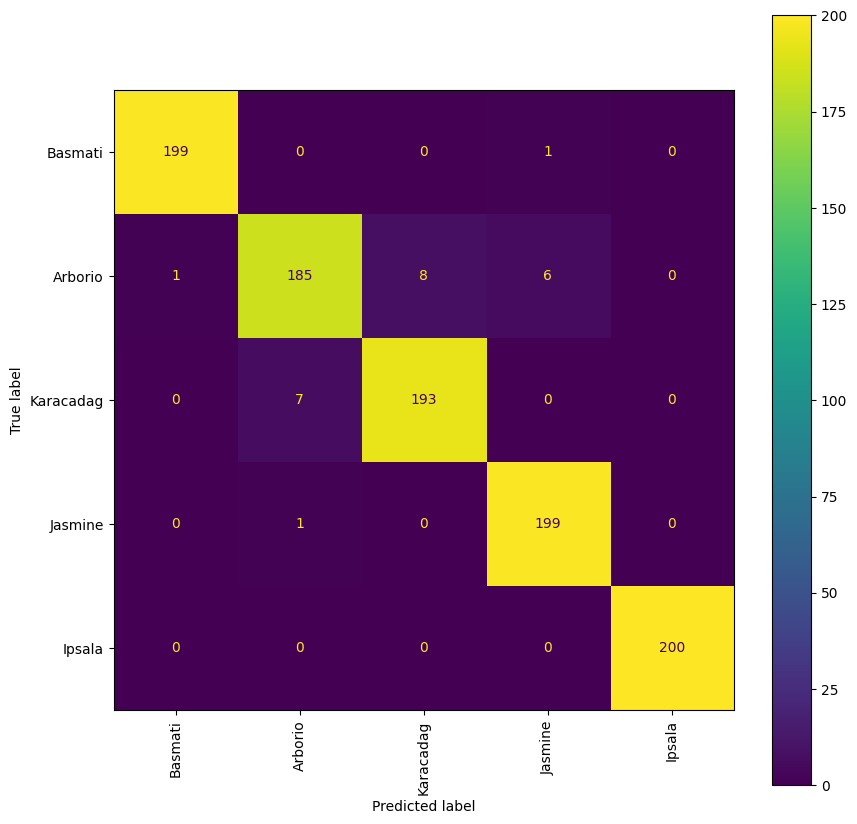

In [97]:
cm = confusion_matrix(y_true=y_test, y_pred=y_mlp_pred)

fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test, y_mlp_pred, 
                                        ax=ax,
                                        display_labels=types_rice,
                                        xticks_rotation='vertical')
plt.show()

In the next part, we will improve the model by adding more layers and control the number of units in each hidden layer.

## Model MLP improve

Now we will use more layers and control the number of units in each hidden layer

### Build model

In [98]:
tf.keras.backend.clear_session()

model_mlp_improve = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2500)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='softmax'),
])


In [99]:
model_mlp_improve.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                160064    
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 5)                 85        
                                                                 
Total params: 162,757
Trainable params: 162,757
Non-trainable params: 0
_________________________________________________________________


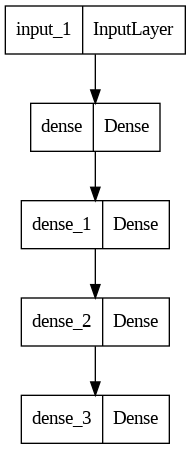

In [100]:
tf.keras.utils.plot_model(model_mlp_improve)

### Trainning and complie


In [101]:
# chose learning_rate = 0.001
model_mlp_improve.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=0.001, momentum=0.9, decay=0, nesterov=False),
             metrics=['accuracy'])


In [102]:
model_mlp_his1 = model_mlp_improve.fit(X_train, 
               y_train,
              epochs=20,
              batch_size=32,
              validation_data=(X_val, y_val))

Epoch 1/20
110/110 [==============================] - 1s 5ms/step - loss: 1.4369 - accuracy: 0.3763 - val_loss: 1.2057 - val_accuracy: 0.5640
Epoch 2/20
110/110 [==============================] - 0s 4ms/step - loss: 1.0282 - accuracy: 0.6180 - val_loss: 0.8501 - val_accuracy: 0.6920
Epoch 3/20
110/110 [==============================] - 0s 4ms/step - loss: 0.6578 - accuracy: 0.8534 - val_loss: 0.4793 - val_accuracy: 0.9440
Epoch 4/20
110/110 [==============================] - 0s 3ms/step - loss: 0.3569 - accuracy: 0.9551 - val_loss: 0.2740 - val_accuracy: 0.9720
Epoch 5/20
110/110 [==============================] - 0s 4ms/step - loss: 0.2182 - accuracy: 0.9694 - val_loss: 0.1871 - val_accuracy: 0.9720
Epoch 6/20
110/110 [==============================] - 0s 3ms/step - loss: 0.1526 - accuracy: 0.9749 - val_loss: 0.1453 - val_accuracy: 0.9720
Epoch 7/20
110/110 [==============================] - 0s 4ms/step - loss: 0.1188 - accuracy: 0.9754 - val_loss: 0.1166 - val_accuracy: 0.9760
Epoch 

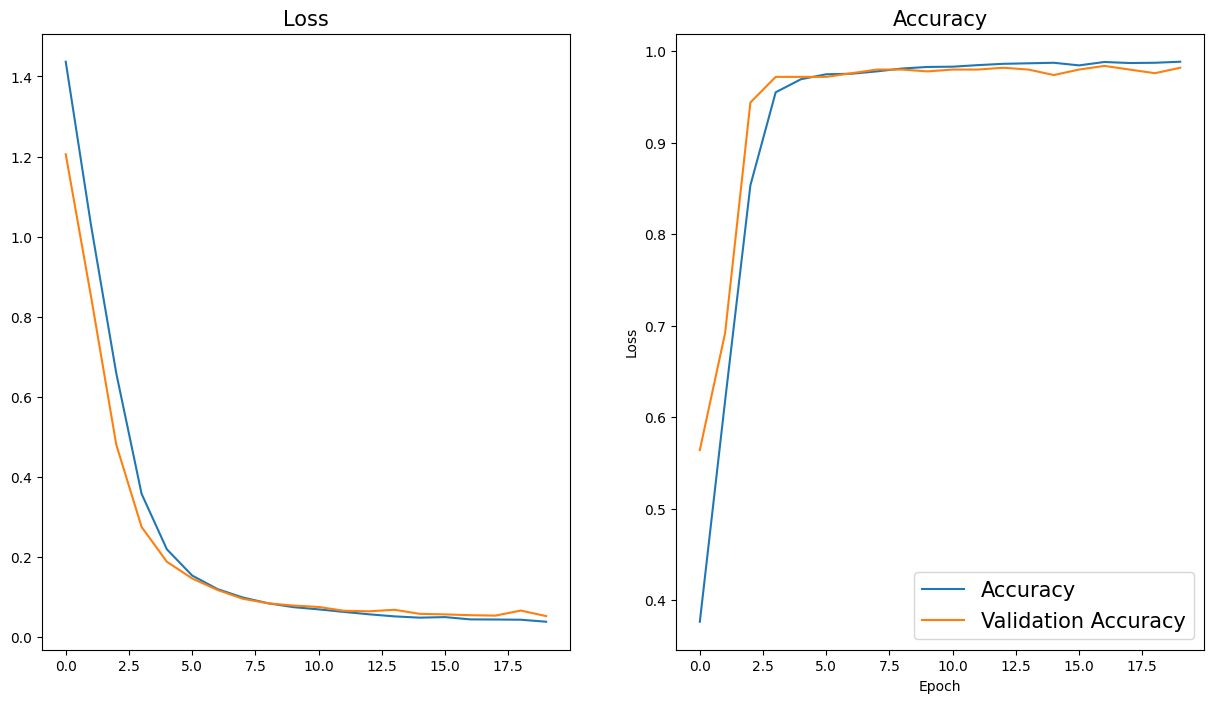

In [103]:
fig, ax = plt.subplots(1,2,figsize=(15, 8))

ax[0].plot(model_mlp_his1.history['loss'], label='Loss')
ax[0].plot(model_mlp_his1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
ax[0].set_title('Loss', fontsize=15)

ax[1].plot(model_mlp_his1.history['accuracy'], label='Accuracy')
ax[1].plot(model_mlp_his1.history['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Accuracy', fontsize=15)

plt.legend(loc='best', fontsize=15)

### Model evaluation and prediction

In [104]:
# Evalute model on test dataset
model_mlp_improve.evaluate(X_test, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.0568 - accuracy: 0.9790


[0.05683150887489319, 0.9789999723434448]

In [105]:
y_mlp_pred1 = model_mlp_improve.predict(X_test)
predictied_label1 = np.argmax(y_mlp_pred1, axis=1)

32/32 [==============================] - 0s 2ms/step


In [106]:
report1 = classification_report(y_test, predictied_label1, target_names=types_rice)
print(report1)

              precision    recall  f1-score   support

     Basmati       1.00      0.99      1.00       200
     Arborio       0.97      0.93      0.95       200
   Karacadag       0.94      0.98      0.96       200
     Jasmine       0.99      0.99      0.99       200
      Ipsala       1.00      1.00      1.00       200

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



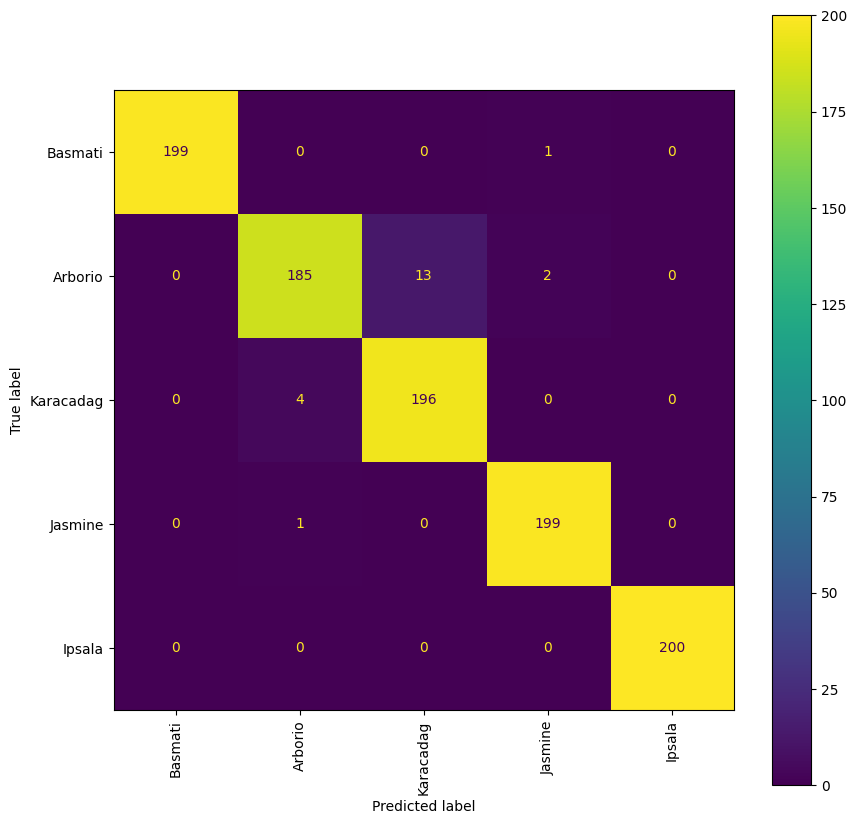

In [107]:
#Confusion matrix
cm = confusion_matrix(y_true=y_test, y_pred=predictied_label1)

fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test, predictied_label1, 
                                        ax=ax,
                                        display_labels=types_rice,
                                        xticks_rotation='vertical')
plt.show()

We can find that this model performs better than the basic model. <br/>
For test dataset, basic model has an accuracy of **72.60%** while the improved model has an accuracy of **98.20%**



### Save Model MLP

In [108]:
# Save Model
model_mlp_improve.save('model_MLP')


# IV CNN Model


## Prepare data for CNN model


In the CNN model, we have to make the dataset (pixels on images) from 1D (2500,) to 2D (50, 50), so we need to do a reshape to the features first.

In [109]:
X_train_CNN = X_train.to_numpy().reshape(-1, 50, 50, 1)
X_val_CNN = X_val.to_numpy().reshape(-1, 50, 50, 1)
X_test_CNN = X_test.to_numpy().reshape(-1, 50, 50, 1)
X_train_CNN.shape

(3500, 50, 50, 1)

## Create Model CNN and Build

In [110]:
tf.keras.backend.clear_session()
input_layer = tf.keras.Input(shape=(50, 50, 1))

conv = tf.keras.layers.Conv2D(filters=32,
                              kernel_size=3,
                              activation='relu', padding='valid')(input_layer)

maxpool = tf.keras.layers.MaxPool2D(pool_size=2,
                                    strides=2)(conv)

flatten2 = tf.keras.layers.Flatten()(maxpool)

dense1 = tf.keras.layers.Dense(units=30,
                              activation='relu')(flatten2)

dense2 = tf.keras.layers.Dense(units=15,
                              activation='relu')(dense1)

dropout = tf.keras.layers.Dropout(rate=0.1, seed=100)(dense2)


output = tf.keras.layers.Dense(units=5,
                              activation='softmax')(dropout)

In [111]:
model = tf.keras.Model(inputs=input_layer, outputs=output)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 50, 50, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 30)                552990    
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                             

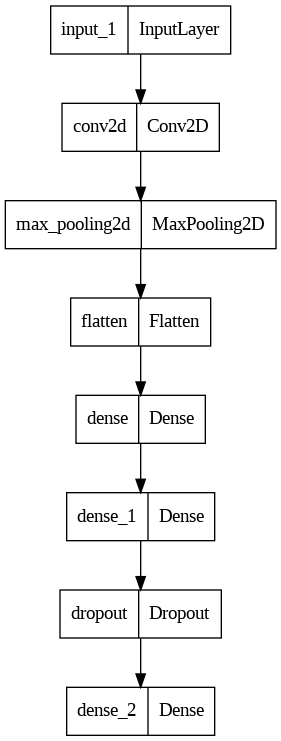

In [112]:
tf.keras.utils.plot_model(model,'model_CNN.png')

## Model compile and training

In [113]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             metrics=['accuracy'])
model_CNN = model.fit(X_train_CNN,
          y_train,
          epochs=20,
          shuffle=True,
          validation_data=(X_val_CNN, y_val),
          batch_size=64,
          callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=10))

Epoch 1/20
55/55 [==============================] - 2s 10ms/step - loss: 0.7905 - accuracy: 0.6789 - val_loss: 0.1456 - val_accuracy: 0.9820
Epoch 2/20
55/55 [==============================] - 0s 6ms/step - loss: 0.1992 - accuracy: 0.9243 - val_loss: 0.0919 - val_accuracy: 0.9760
Epoch 3/20
55/55 [==============================] - 0s 6ms/step - loss: 0.1458 - accuracy: 0.9520 - val_loss: 0.0803 - val_accuracy: 0.9840
Epoch 4/20
55/55 [==============================] - 0s 7ms/step - loss: 0.1181 - accuracy: 0.9586 - val_loss: 0.0589 - val_accuracy: 0.9840
Epoch 5/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0932 - accuracy: 0.9666 - val_loss: 0.0642 - val_accuracy: 0.9780
Epoch 6/20
55/55 [==============================] - 0s 6ms/step - loss: 0.0676 - accuracy: 0.9760 - val_loss: 0.0539 - val_accuracy: 0.9860
Epoch 7/20
55/55 [==============================] - 0s 7ms/step - loss: 0.0702 - accuracy: 0.9763 - val_loss: 0.0987 - val_accuracy: 0.9620
Epoch 8/20
55/55 [=

In [114]:
model_CNN_his = model_CNN.history
model_CNN_his

{'loss': [0.7905459403991699,
  0.19921866059303284,
  0.1457885205745697,
  0.11813174188137054,
  0.09324988722801208,
  0.0675869807600975,
  0.07015342265367508,
  0.07266879826784134,
  0.056284137070178986,
  0.04794620722532272,
  0.059837888926267624,
  0.059933893382549286,
  0.039192721247673035,
  0.03968898952007294,
  0.03859741985797882,
  0.033252593129873276,
  0.03397104889154434,
  0.035804204642772675,
  0.04321807250380516,
  0.028334051370620728],
 'accuracy': [0.678857147693634,
  0.9242857098579407,
  0.9520000219345093,
  0.9585714340209961,
  0.9665714502334595,
  0.9760000109672546,
  0.9762856960296631,
  0.9717142581939697,
  0.9817143082618713,
  0.982285737991333,
  0.9782857298851013,
  0.9768571257591248,
  0.9862856864929199,
  0.9865714311599731,
  0.9879999756813049,
  0.9877142906188965,
  0.9885714054107666,
  0.9871428608894348,
  0.9854285717010498,
  0.9902856945991516],
 'val_loss': [0.1456153690814972,
  0.09185852110385895,
  0.080273866653442

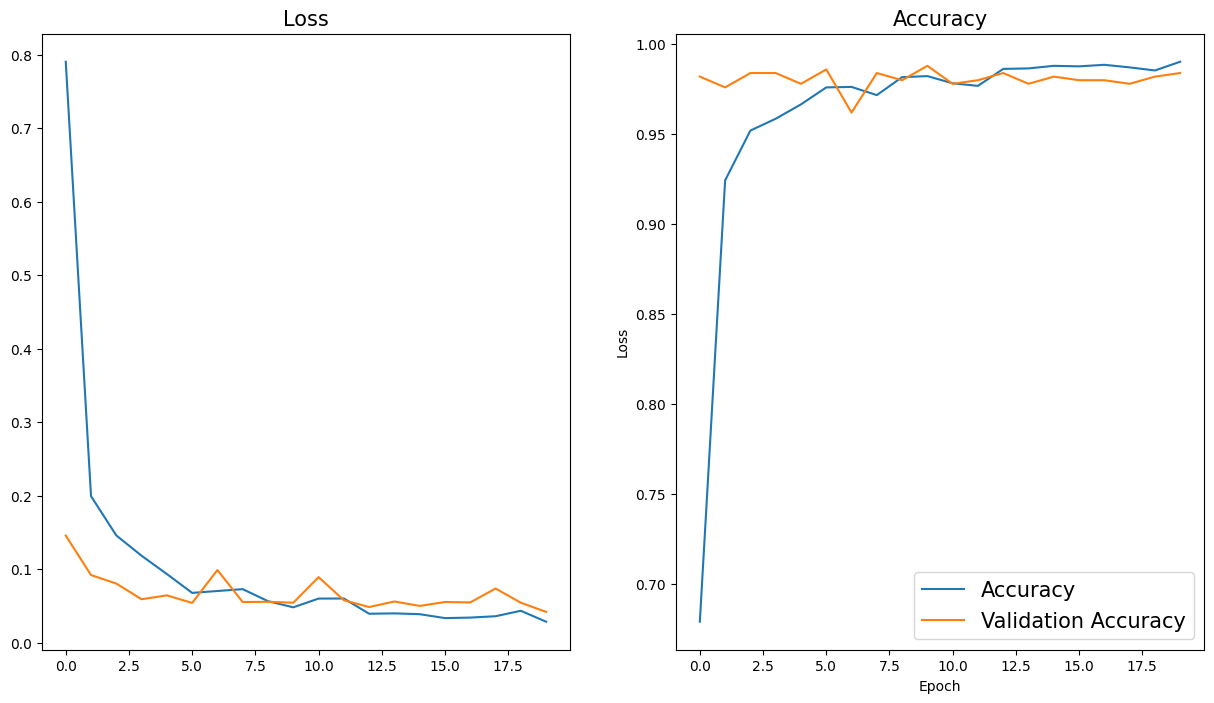

In [115]:
fig, ax = plt.subplots(1,2,figsize=(15, 8))

ax[0].plot(model_CNN_his['loss'], label='Loss')
ax[0].plot(model_CNN_his['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
ax[0].set_title('Loss', fontsize=15)

ax[1].plot(model_CNN_his['accuracy'], label='Accuracy')
ax[1].plot(model_CNN_his['val_accuracy'], label='Validation Accuracy')
ax[1].set_title('Accuracy', fontsize=15)

plt.legend(loc='best', fontsize=15)

## Model evaluation and prediction

In [116]:
model.evaluate(X_test_CNN, y_test)

32/32 [==============================] - 0s 3ms/step - loss: 0.0520 - accuracy: 0.9880


[0.051975298672914505, 0.9879999756813049]

In [117]:
y_pred1 = model.predict(X_test_CNN)
predictied_label = np.argmax(y_pred1, axis=1)

32/32 [==============================] - 0s 2ms/step


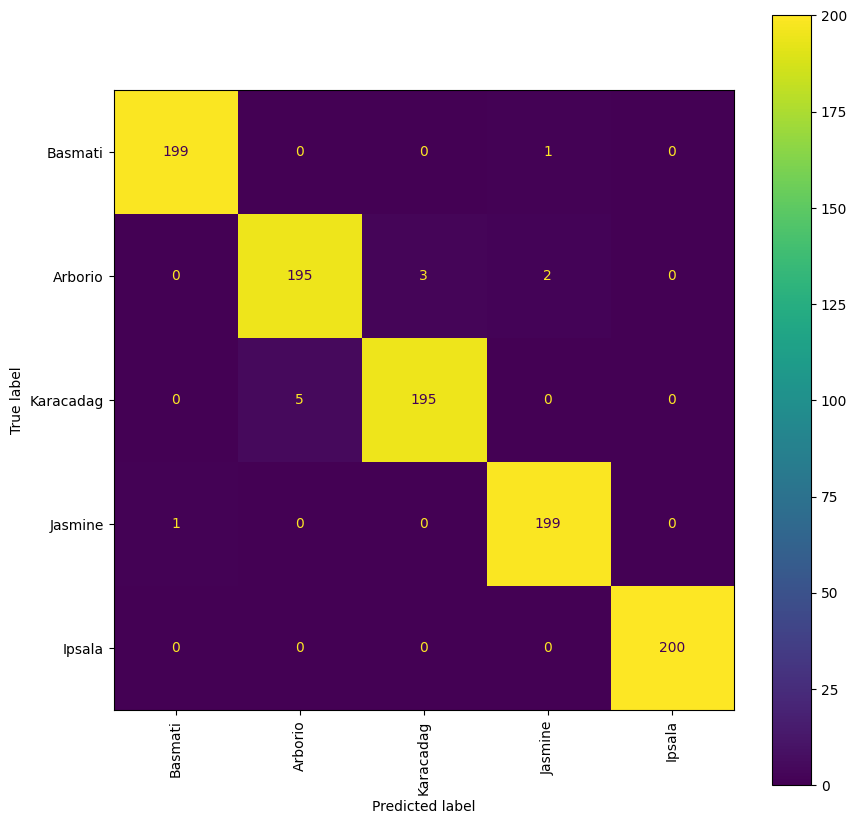

In [118]:

cm = confusion_matrix(y_true=y_test, y_pred=predictied_label)

fig, ax = plt.subplots(figsize=(10,10))
ConfusionMatrixDisplay.from_predictions(y_test, predictied_label, 
                                        ax=ax,
                                        display_labels=types_rice,
                                        xticks_rotation='vertical')
plt.show()

When we use model CNN accuracy is 98.80% 

## Save Model CNN

In [119]:
model.save('model_CNN')